# Project: HR Data Analysis & Building Attrition Model

This file contains code for 

1. Exploratory Data Analysis with its inferences
2. Data Cleaning Preprocessing
3. Build Model and present results

## Import Libraries and Data

In [1]:
#Import libraries
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


# import data
data = pd.read_csv('HR_data.csv')

In [2]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 1. Exploratory Data Analysis

### 1.1 Dataset information

In [2]:
# Checking high level dataset info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Inference from above info: 
* 1470 rows/training samples
* 35 Columns (categorical(9), numerical(26))
* 2 data types: int64, object

In [3]:
# Checking how data looks like
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Inference from above table: 
* Since we are trying to predict employ attrition, we consider Attrition as label.
* Rest of the columns are considered as inputs or features.
* Attrition is categorical (binary).
* Other inputs are both categorical and numerical variables.

### 1.2 Seperating Data for further analysis

In [4]:
# Seperating data as inputs(X) and Label(y)
X = data.drop('Attrition', axis =1)
y = data['Attrition']
print(f"Input Data shape: {X.shape}, Target Data shape: {y.shape}")

Input Data shape: (1470, 34), Target Data shape: (1470,)


In [5]:
# Seperating categorical features(catX) 
catX = X.loc[:,X.dtypes == np.object]

# Seperating numerical features(numX)
numX = X.loc[:,X.dtypes != np.object]

print(f"Categorical features shape: {catX.shape}, Numerical features shape: {numX.shape}")

Categorical features shape: (1470, 8), Numerical features shape: (1470, 26)


### 1.3 Label distribution

In [6]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

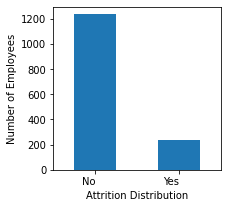

In [7]:
y.value_counts().plot(kind = 'bar',figsize = (3,3))
plt.xticks(rotation=0, ha='right')
plt.xlabel("Attrition Distribution")
plt.ylabel("Number of Employees")
plt.show()

We can see 16.1% (231) of total training data belongs to **class yes**. Since it is not too low, we can skip data sampling.

In [8]:
# Converting Attrition column into 1's and 0's instead of 'Yes' and 'No'
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y, name = 'Attrition')

### 1.4 Categorical Input distribution

In [9]:
# Understanding categorical data
catX.describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Inferences made from above data:
1. There is no missing data in these inputs as the total count matches to the overall records counts.
2. 'Over18' column has only 1 value. This doesnot help in analysis or for the model. we can drop this input.
3. Once analyzed, we can convert the categorical data into numerical values using one hot encoding for the model.

In [10]:
# Dropping column Over18 as it has only 1 value for all records
try: 
    catX.drop(['Over18'],axis = 1, inplace = True)
    print('Dropped column Over18')
except:
    print('Already dropped')
print(f"Categorical input data shape after Over18 drop drop: {catX.shape}")

Dropped column Over18
Categorical input data shape after Over18 drop drop: (1470, 7)


### 1.5 Categorical Input distribution

In [11]:
# Understanding numerical input data
numX.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Inferences from above data:
1. Based on the count, we can see that there is no null data in these feature.

Even though it is not obsivous from above table, need to:
2. Check numerical input variance. Low variance numerical data impacts model.
3. Check for outliers. 
4. Check correlation of inputs are with each other.
5. Check correlation of inputs with attrition.
5. Check data distribution of each feature to analyze further
6. Scale numerical dataset for better results once analyzed

Lets address these issues one after another in the following sections.

#### 1.5.1 Missing data

In [12]:
# Identifying missing data count and its percentage
null_val = numX.isnull().sum()
null_val_percent = 100 * numX.isnull().sum() / len(numX)

null_df = pd.concat([null_val, null_val_percent], axis=1)
null_df_col = null_df.rename(columns = {0 : 'Null Values Count', 1 : 'Null Values %'})

null_df_col = null_df_col[null_df_col.iloc[:,1] != 0].sort_values('Null Values %', ascending=False).round(1)
print ("Out of " + str(numX.shape[1]) + " features, " + str(null_df_col.shape[0]) 
       + " have missing values. Here are details:")

null_df_col

Out of 26 features, 0 have missing values. Here are details:


,Null Values Count,Null Values %


#### 1.5.2 Numerical feature variance

In [13]:
# Top 10 low feature variances (assending order)
numX.var().sort_values()

StandardHours               0.000000e+00
EmployeeCount               1.233434e-32
PerformanceRating           1.301936e-01
WorkLifeBalance             4.991081e-01
JobInvolvement              5.063193e-01
StockOptionLevel            7.260346e-01
Education                   1.048914e+00
RelationshipSatisfaction    1.169013e+00
EnvironmentSatisfaction     1.194829e+00
JobSatisfaction             1.216270e+00
JobLevel                    1.225316e+00
TrainingTimesLastYear       1.662219e+00
NumCompaniesWorked          6.240049e+00
YearsSinceLastPromotion     1.038406e+01
YearsWithCurrManager        1.273160e+01
YearsInCurrentRole          1.312712e+01
PercentSalaryHike           1.339514e+01
YearsAtCompany              3.753431e+01
TotalWorkingYears           6.054056e+01
DistanceFromHome            6.572125e+01
Age                         8.345505e+01
HourlyRate                  4.132856e+02
DailyRate                   1.628196e+05
EmployeeNumber              3.624333e+05
MonthlyIncome   

In [14]:
# Number of unique values
numX.nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

Inference from above table:
* We can clearly see that 'EmployeeCount'and 'StandardHours' has one unique values and zero variance
* As these does not provide any value to the model, dropping them

In [15]:
# Dropping column StandardHours as it has only 1 value for all records
try: 
    numX.drop(['EmployeeCount','StandardHours'],axis = 1, inplace = True)
    print('Dropped column EmployeeCount and StandardHours')
except:
    print('Already dropped')
print(f"Numerical input data shape after EmployeeCount and StandardHours drop: {numX.shape}")

Dropped column EmployeeCount and StandardHours
Numerical input data shape after EmployeeCount and StandardHours drop: (1470, 24)


#### 1.5.3 Checking outliers

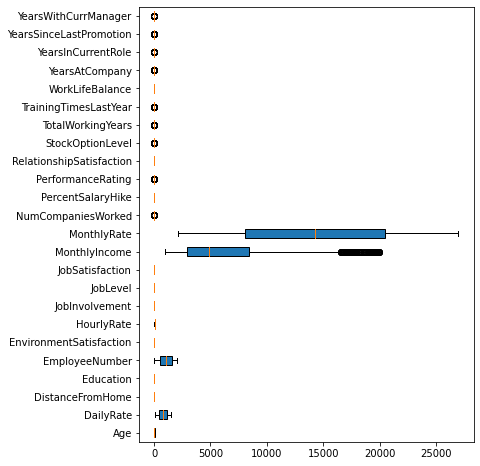

In [16]:
# Checking outliers with boxplot
plt.figure(figsize=(6,8))
plt.rcParams["font.size"] =10
plt.boxplot(numX.values,labels=numX.columns,vert=False,patch_artist=True)
plt.show()

Inference from above plot:
* Monthly income column has outliers. Other columns seems to be ok

In [17]:
# Further analyzing outliers of input 'MonthlyIncome' by check how data is distributed
numX[['MonthlyIncome']].describe(percentiles=[0.05,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,0.95])

,MonthlyIncome
count,1470.000000
mean,6502.931293
std,4707.956783
min,1009.000000
5%,2097.900000
10%,2317.600000
20%,2695.800000
30%,3316.900000
50%,4919.000000
60%,5743.400000


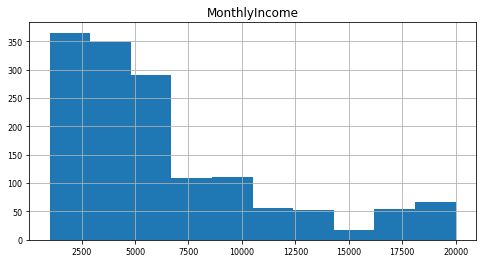

In [18]:
# Plot to see how data distibution of 'MonthlyIncome' look like
numX[['MonthlyIncome']].hist(figsize=(8, 4), bins=10, xlabelsize=8, ylabelsize=8);

Inference above plot/table:
* MonthlyIncome data seems to have a right skewed.
* For now we will keep the outliers as is and analyze further.

#### 1.5.4 Correlation between numerical features

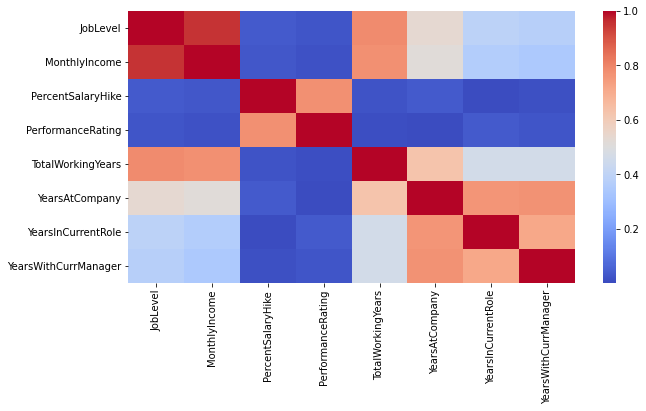

In [75]:
# Function to retrieve correlation matrix based on threshold
def abs_high_corr(df, absThresh):
    index = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            index.add(r)
            index.add(c)
    index = sorted(index)
    return df.loc[index,index]

#Plotting correlation heatmap with absolute corr >0.6
plt.figure(figsize=(10,5))
sns.heatmap(abs_high_corr(numX.corr().abs(),0.7), cmap = 'coolwarm')
plt.show()

Inference from above plot:
* 'Job Level' and 'Monthly Income' are highly correlated (>0.9)
* 'Years At Company', 'Years In Current Role' and 'Years with Current Manager' seems to have high correation (>0.8) as well
* 'Job Level', 'Monthly Income' and 'Total working Years' have correlation >0.8 as well

Note: Higher the correlation between the inputs, more redundant the inputs become to the model 

#### 1.5.5 Correlation between numerical features and target

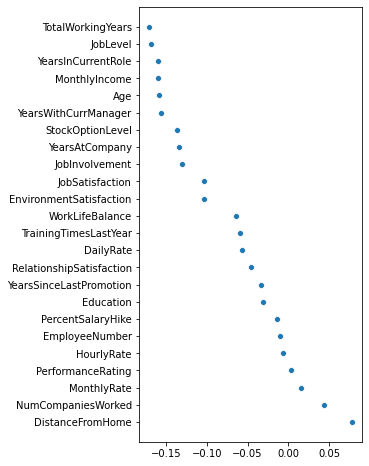

In [20]:
corr_with_y = numX.corrwith(y).sort_values(ascending = False)
plt.figure(figsize=(4,8))
plt.rcParams["font.size"] =10
sns.scatterplot(x = corr_with_y, y=corr_with_y.index)
plt.show()

Inference from above plot:
* Input numerical data is not much correlated to the Attrition

#### 1.5.6 Data distribution of each numerical features

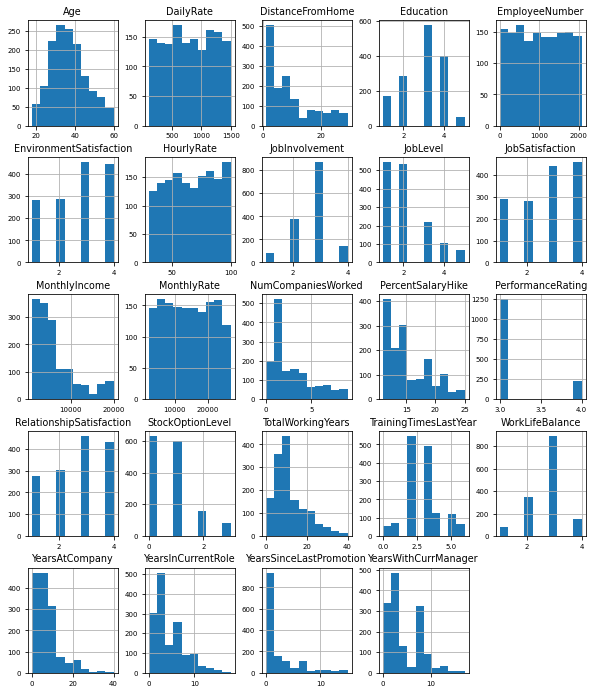

In [21]:
# Histogram of each feature in numerical dataset
plt.rcParams["font.size"] =8
numX.hist(figsize=(10,12), bins=10, xlabelsize=7, ylabelsize=7);

Inference from above:
* Majority of featues are normally distributed, with few right skewed, left skewed and few bimodel distributions.
* No red flags in numerical inputs 

### 1.6 Final dataset after clean up

In [22]:
# Concatenating final categorical and numerical datasets
data = pd.concat([numX, catX,y], axis = 1)

# Printing final train dataset
print(f"Final train dataset shape: {data.shape}")

Final train dataset shape: (1470, 32)


In [23]:
def plot(input_col, x_no_numeric):
    """
    Function will plot bar and line plots for input columns we provide
    Inputs:
    input_col: takes in input column data
    x_no_numeric: if True, sort descending, if not, do nothing.
    """
    tmp1 = data[(data['Attrition'] == 1)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[input_col],data['Attrition']),)
    tmp3['Attr%'] = tmp3[1]/ (tmp3[1] + tmp3[0]) * 100
    
    if x_no_numeric == True: 
        tmp3 = tmp3.sort_values(1, ascending = False)


    plot1 = go.Bar(
        x=tmp1[input_col].value_counts().keys().tolist(),
        y=tmp1[input_col].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(color='red',line=dict(color='#000000',width=1)))

    plot2 = go.Bar(
        x=tmp2[input_col].value_counts().keys().tolist(),
        y=tmp2[input_col].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(color='green',line=dict(color='#000000',width=1)))
    
    plot3 =  go.Scatter(x=tmp3.index, y=tmp3['Attr%'], yaxis = 'y2',name='% Attrition', opacity = 0.6, 
                        marker=dict(color='black',line=dict(color='#000000',width=0.5)))

    layout = dict(title =  str(input_col),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75],overlaying= 'y',anchor= 'x',side= 'right',zeroline=False,
                          showgrid= False,title= '% Attrition'))

    fig = go.Figure(data=[plot1, plot2, plot3], layout=layout)
    fig.update_layout(autosize=False, width=500,height=500,margin=dict(l=50,r=50,b=100,t=100,pad=4))
    py.iplot(fig)

In [72]:
# Plotting all numeric inputs with Attrition
input_list= ['Age', 'DistanceFromHome','Education', 'EnvironmentSatisfaction','JobInvolvement','JobLevel', 'JobSatisfaction',
 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for columns in input_list:
    plot(columns,False)

In [73]:
# Plotting all Categorical inputs with Attrition
for columns in catX.columns.tolist():
    plot(columns,True)

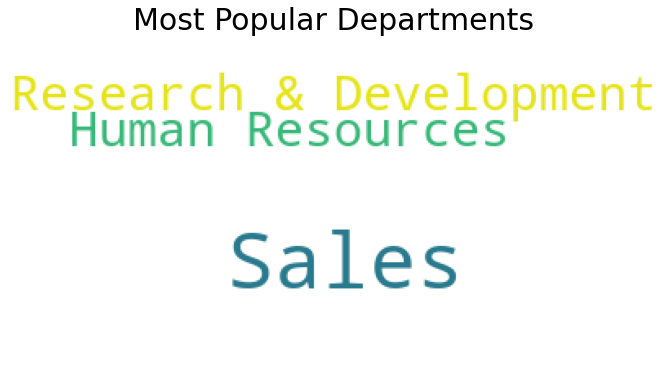

In [59]:
# looking at the most popular departments

from wordcloud import WordCloud
from collections import Counter

departments = data['Department'].unique().tolist()
wordcloud = WordCloud(background_color ='white').generate_from_frequencies(Counter(departments))

plt.rcParams['figure.figsize'] = (12, 6)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

## Model Preprocessing

This preprocess the data and make data ready for the model

In [25]:
class Preprocessing():
    
    def __init__(self, features):
        super(Preprocessing, self).__init__()
        self.features = features
        
    def steps(self):
        """
        Function will perform preprocessing steps to cleanup given dataframe
        Output: Returns pandas dataframe
        """
        
        # SETP1: Categorical and Numerical Feature Seperation
        catX = self.loc[:,self.dtypes == np.object]
        numX = self.loc[:,self.dtypes != np.object]
        print(f">Categorical data shape: {catX.shape}, Numerical data shape: {numX.shape}")
        

        # STEP2: Dropping 'Over18' categorical input'EmployeeCount'and 'StandardHours'
        catX.drop(['Over18'],axis = 1, inplace = True)
        print('>Dropped categorical input Over18 as it have only 1 value')
            
        # STEP3: Converting categorical features with multi value
        ## Applying One Hot Encoder
        ohe = OneHotEncoder()    
        catX_encoded = pd.DataFrame(ohe.fit_transform(catX).toarray())
        catX_encoded.columns = ohe.get_feature_names(catX.columns) 
        print(f">Categorical feature data shape after one hot encoding: {catX_encoded.shape}")
        

        # STEP4: Dropping numerical input'EmployeeCount'and 'StandardHours'
        numX.drop(['EmployeeCount','StandardHours'],axis = 1, inplace = True)
        print('>Dropped numerical inputs EmployeeCount and StandardHours as they have only 1 value')


        # STEP15: Feature Scaling of numerical features
        numX_scaled = pd.DataFrame(StandardScaler().fit_transform(numX),columns=numX.columns)
        print(f">Numerical Feature data shape after applying scaling: {numX_scaled.shape}")
       
        # STEP16: Concatenating Categorial and Numerical datasets
        X = pd.concat([numX_scaled, catX_encoded], axis = 1)
        print(f">Final dataset shape: {X.shape}")
        
        return X

## Model Training and Results

This section trains logistic regression model to classify Attrition and prints model performance results along with important data inputs

MODEL TRAINING:
---------------
>Feature Data shape: (1470, 34), Target Data shape: (1470,)
>Categorical data shape: (1470, 8), Numerical data shape: (1470, 26)
>Dropped categorical input Over18 as it have only 1 value
>Categorical feature data shape after one hot encoding: (1470, 28)
>Dropped numerical inputs EmployeeCount and StandardHours as they have only 1 value
>Numerical Feature data shape after applying scaling: (1470, 24)
>Final dataset shape: (1470, 52)
Training set accuracy: 0.888
Test set accuracy: 0.898
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       247
           1       0.74      0.55      0.63        47

    accuracy                           0.90       294
   macro avg       0.83      0.76      0.79       294
weighted avg       0.89      0.90      0.89       294

Logistic Regression Feature importance
--------------------------------------


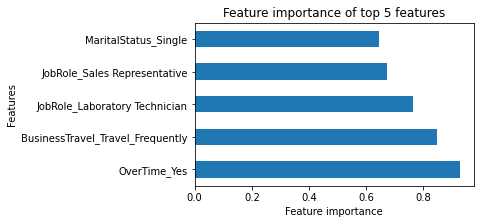

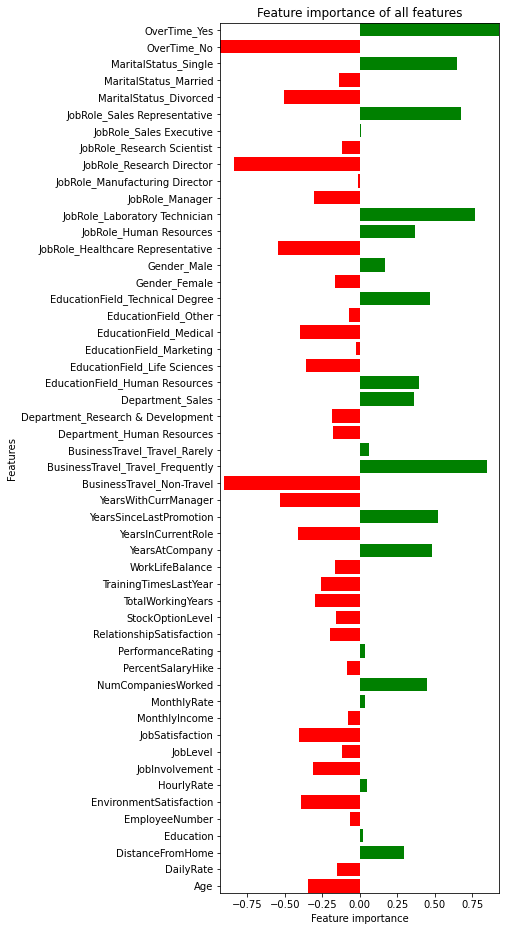

In [26]:
def main(csv_file_name):
    """
    This function will call 'Preprocessing' and 'TrainModels' class to preprocess the data,..
    ... train, save and display results
    Input: 
    perform: takes in two values 'training', 'testing' and does steps respectively
    csv_file_name: Takes in the file name
    """

    print('MODEL TRAINING:')
    print('---------------')
    # Create dataframe
    train_data = pd.read_csv(csv_file_name)

    # Features (X) and Label(y) Seperation
    X = train_data.drop(['Attrition'], axis = 1)
    y = train_data['Attrition']
    # Converting Attrition column into 1's and 0's instead of 'Yes' and 'No'
    le = LabelEncoder()
    y = pd.Series(le.fit_transform(y))
    print(f">Feature Data shape: {X.shape}, Target Data shape: {y.shape}")

    # Get features and label after preprocessing steps
    X = Preprocessing.steps(X)

    # Stratified Train-Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y)

    # Logistic regression classifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report
    log_classifier = LogisticRegression(random_state = 99).fit(X_train, y_train.values.ravel())
    lr_pred = log_classifier.predict(X_test)
    # Feature importance of all features
    importance = pd.Series(log_classifier.coef_[0],index=X.columns)

    print("Training set accuracy: {:.3f}".format(log_classifier.score(X_train, y_train)))
    print("Test set accuracy: {:.3f}".format(log_classifier.score(X_test, y_test)))
    print(classification_report(y_test,lr_pred))

    print("Logistic Regression Feature importance")
    print("--------------------------------------")



    # Feature importance of top 5 features
    plt.rcParams["font.size"] =10
    importance.nlargest(5).plot(kind='barh',figsize=(5,3))
    plt.title("Feature importance of top 5 features")
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.show()

    plt.figure(figsize=(5,16))
    plt.margins(0,0)
    plt.barh(range(52), importance, color=(importance> 0).map({True: 'g',False: 'r'}))
    plt.title("Feature importance of all features")
    plt.yticks(np.arange(52), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.show()

if __name__ == "__main__":
    # calling main function to train and test
    main(csv_file_name = 'HR_data.csv')